In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score , f1_score 
from sklearn.preprocessing import StandardScaler , OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline 

In [16]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [17]:
df.shape

(5630, 20)

In [25]:
df_1 = pd.read_excel(url ,sheet_name = "Data Dict"  , usecols =  [1,2,3])
df_1

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Data,Variable,Discerption
1,E Comm,CustomerID,Unique customer ID
2,E Comm,Churn,Churn Flag
3,E Comm,Tenure,Tenure of customer in organization
4,E Comm,PreferredLoginDevice,Preferred login device of customer
5,E Comm,CityTier,City tier
6,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,E Comm,Gender,Gender of customer
9,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [21]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Data,Variable,Discerption
1,E Comm,CustomerID,Unique customer ID
2,E Comm,Churn,Churn Flag
3,E Comm,Tenure,Tenure of customer in organization
4,E Comm,PreferredLoginDevice,Preferred login device of customer
5,E Comm,CityTier,City tier
6,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,E Comm,Gender,Gender of customer
9,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [23]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


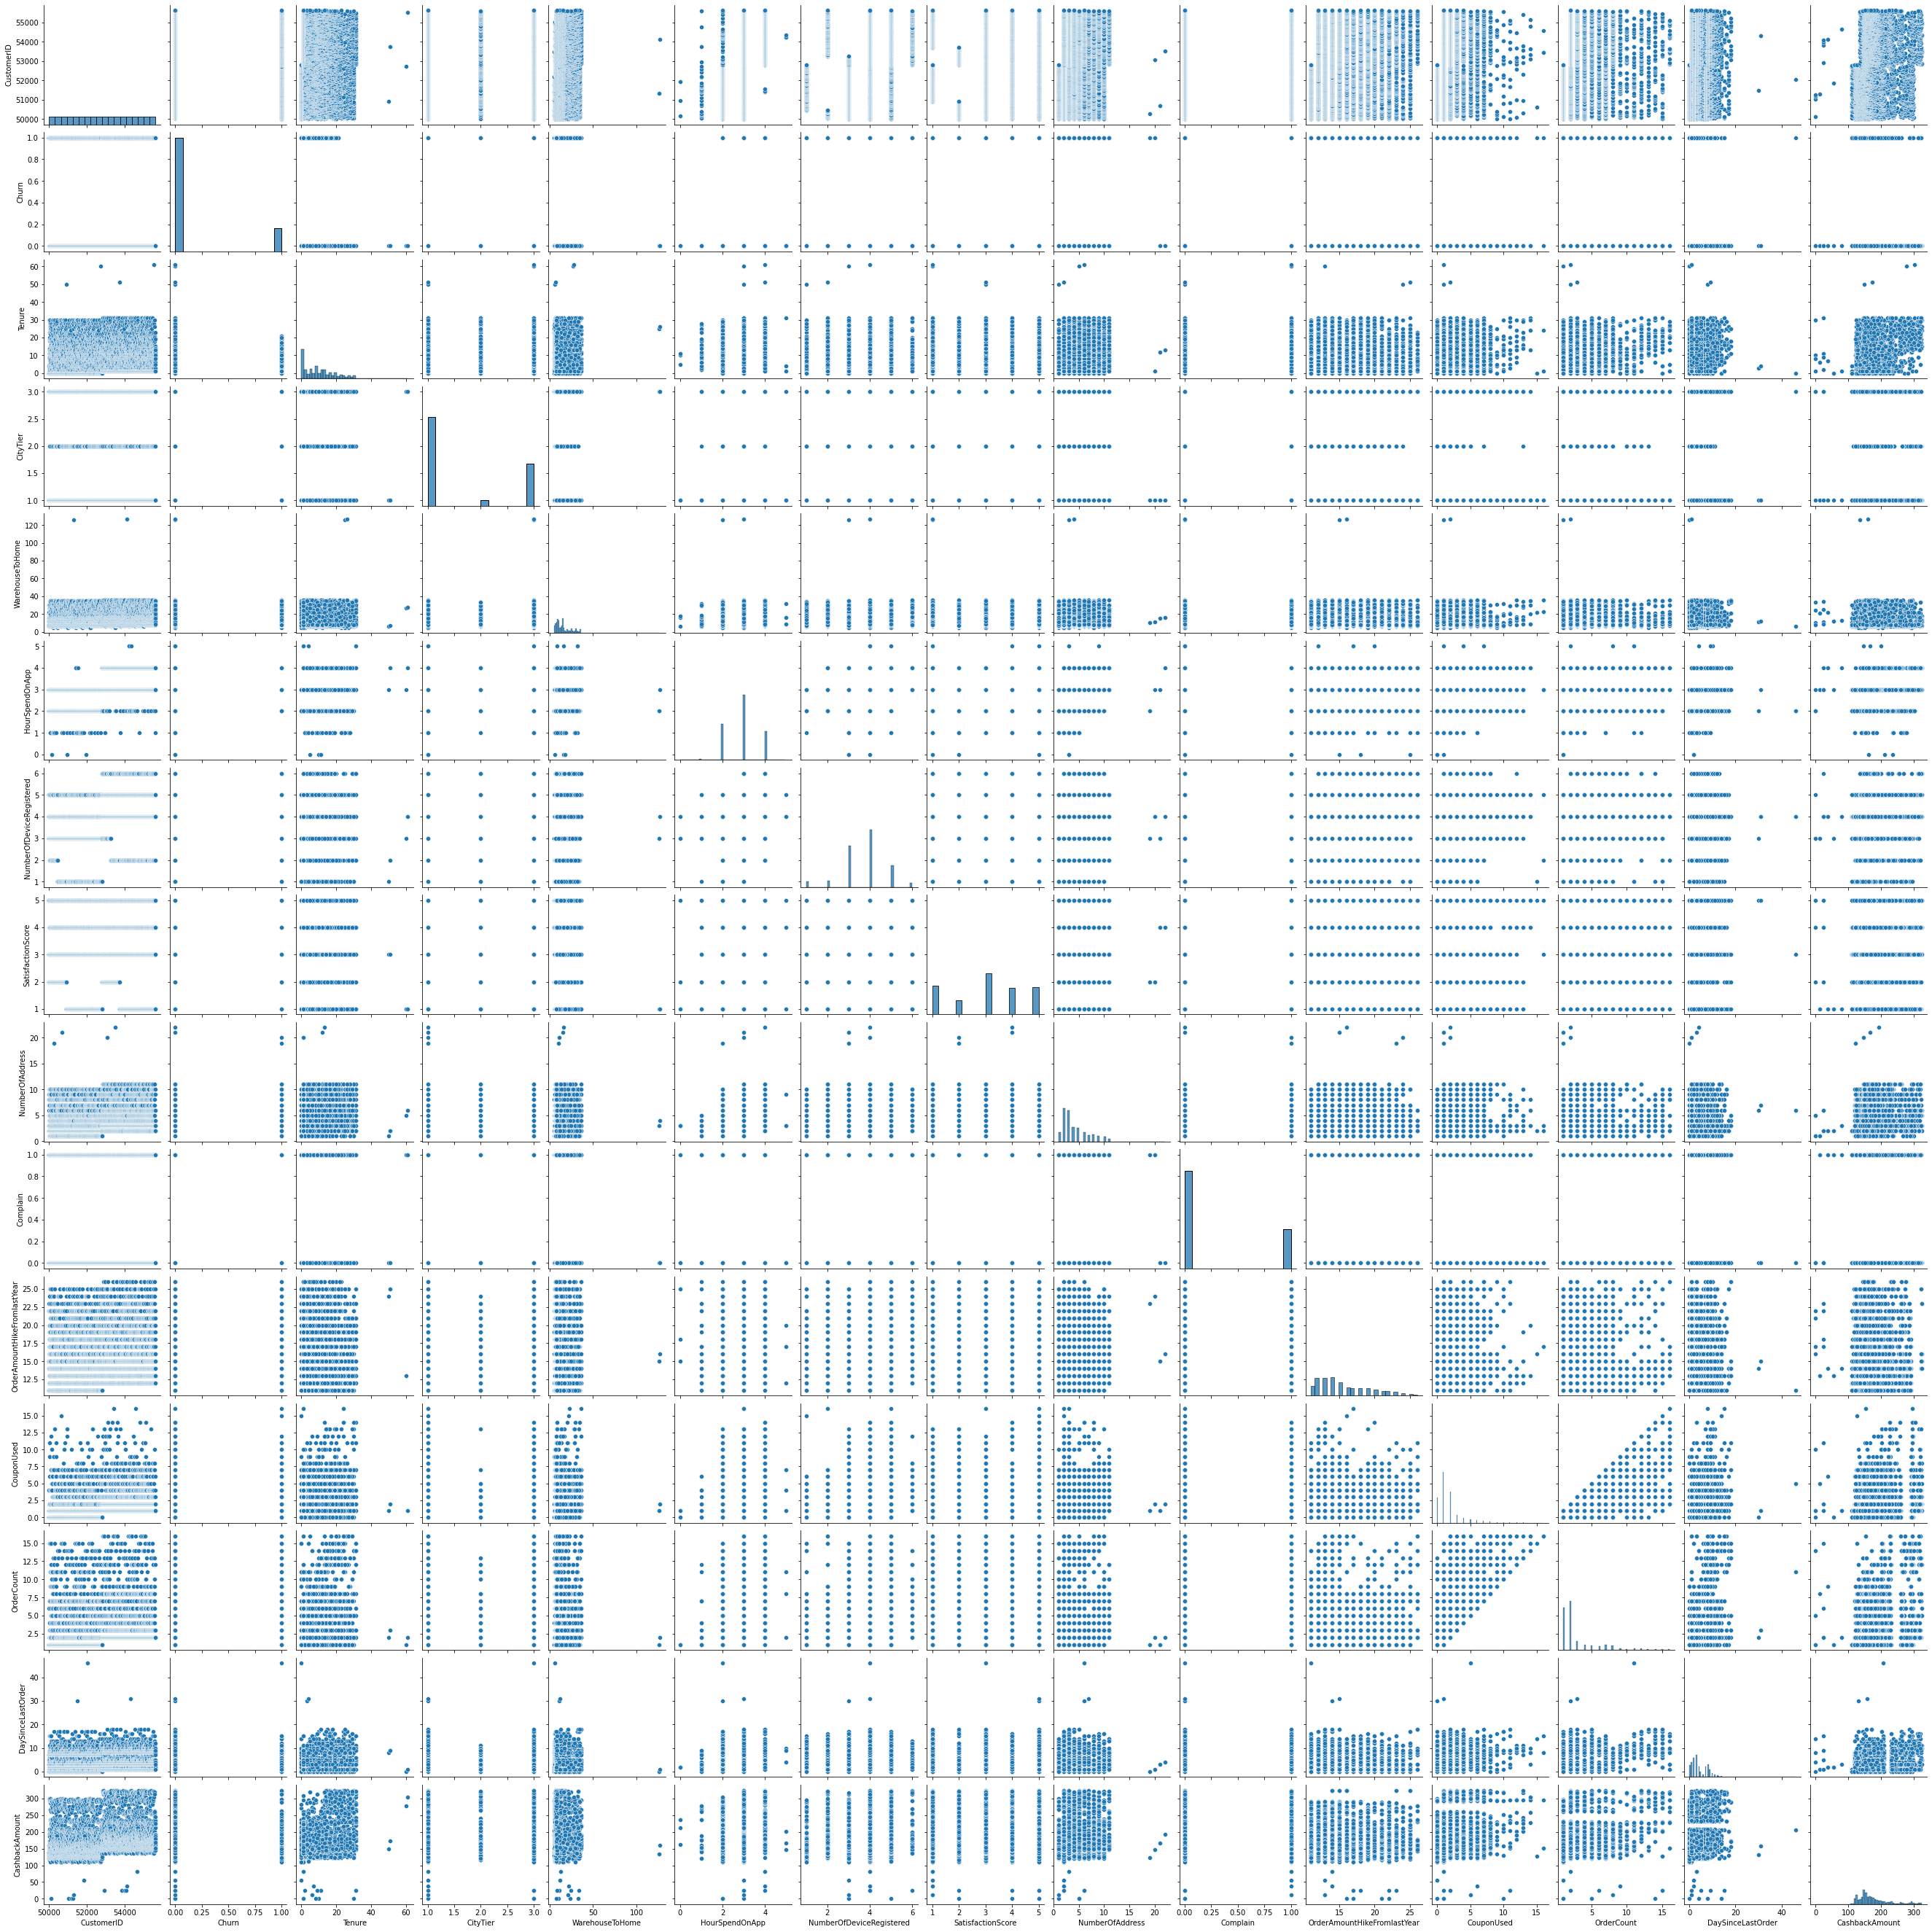

In [27]:
sns.pairplot(df)

plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [29]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [31]:
df['Churn'].value_counts()/len(df)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

In [32]:
a = df['Churn'].value_counts()/len(df)*100

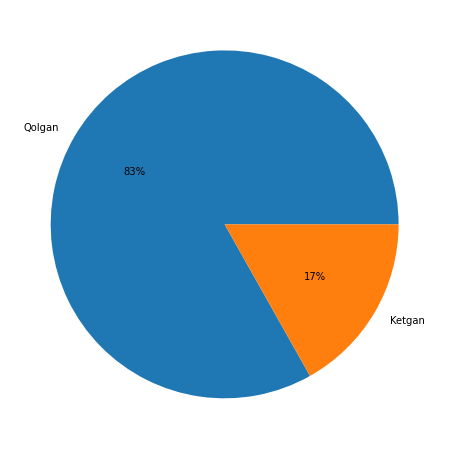

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

plt.pie(a,labels = ['Qolgan','Ketgan'] , autopct = '%1.f%%' , textprops = {'color':'black'})

plt.show()

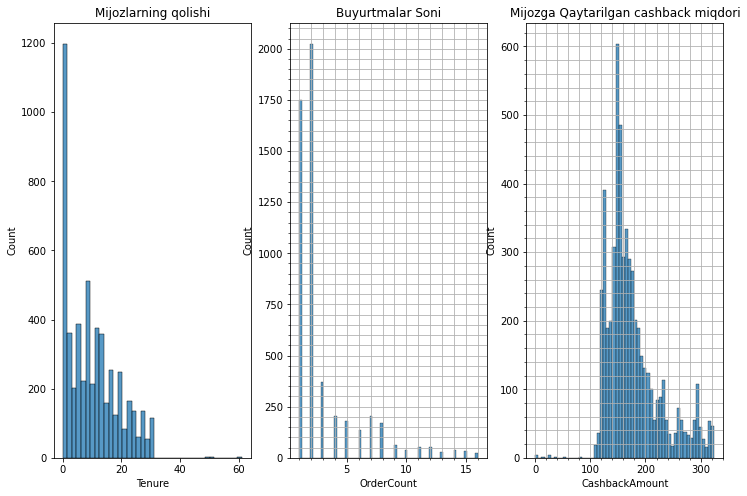

In [55]:
fig , ax = plt.subplots(1,3,figsize = (12,8))
sns.histplot(x = 'Tenure' , data = df  , ax = ax[0])
ax[0].set_title('Mijozlarning qolishi')

sns.histplot(x = 'OrderCount' , data = df , ax = ax[1])
ax[1].set_title('Buyurtmalar Soni')
ax[1].grid(which = 'both')
ax[1].minorticks_on()

sns.histplot(x = 'CashbackAmount' , data = df , ax=ax[2])
ax[2].set_title('Mijozga Qaytarilgan cashback miqdori')
ax[2].grid(which = 'both')
ax[2].minorticks_on()
plt.show()


In [48]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


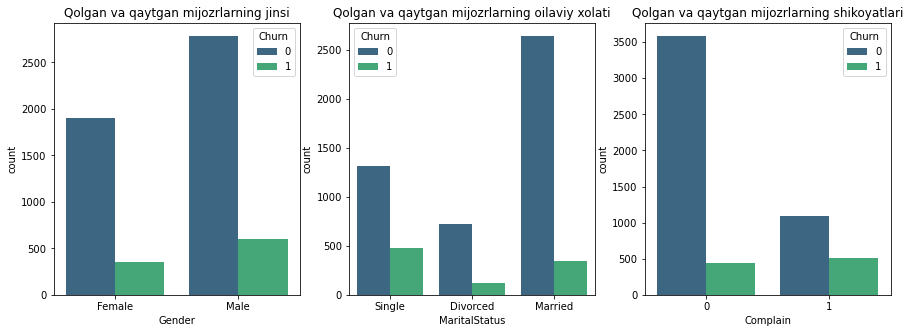

In [58]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning oilaviy xolati")

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozrlarning shikoyatlari")

plt.show()

In [61]:
df.corrwith(df['Churn']).abs().sort_values(ascending = False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [68]:
a = df.isnull().sum().sum()
print(f'{a*100/len(df)}')

32.96625222024867


In [88]:
print(f"Mavjud bolmagan qiymatlar soni:{df.isnull().sum().sum()} ")
print(f"Mavjud bolmagan qatorlar soni:{df[df.isnull().any(axis=1)].shape[0]}")
print(f"MAvjud bolmagan qiymatlar % :{round(df.isnull().sum().sum()/len(df)*100)}%")

Mavjud bolmagan qiymatlar soni:1856 
Mavjud bolmagan qatorlar soni:1856
MAvjud bolmagan qiymatlar % :33%


In [92]:
df.corrwith(df['Churn']).abs().sort_values(ascending = False)
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [93]:
df[df.isnull().any(axis=1)].shape[0]

1856

In [94]:
print(f"Mavjud bolmagan qiymatlar soni:{data.isnull().sum().sum()} ")
print(f"Mavjud bolmagan qatorlar soni:{data[data.isnull().any(axis=1)].shape[0]}")
print(f"MAvjud bolmagan qiymatlar % :{round(data.isnull().sum().sum()/len(data)*100)}%")

Mavjud bolmagan qiymatlar soni:571 
Mavjud bolmagan qatorlar soni:571
MAvjud bolmagan qiymatlar % :10%


In [95]:
data.shape

(5630, 7)

In [97]:
data = data.dropna()

In [98]:
encoded = pd.get_dummies(data)

In [99]:
encoded

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,0,1.0,154.66,0,0,1,1,0
5625,0,10.0,0,4.0,150.71,0,1,0,0,1
5627,0,1.0,1,4.0,186.42,0,1,0,0,1
5628,0,23.0,0,9.0,178.90,0,1,0,0,1


In [100]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [101]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [103]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### Logistic Regression

In [127]:
LR_model.fit(X_train , y_train)

LogisticRegression()

In [128]:
y_predict = LR_model.predict(X_test)

print(f"Model Aniqligi:{accuracy_score(y_test , y_predict)}")

Model Aniqligi:0.8794466403162056


<AxesSubplot:>

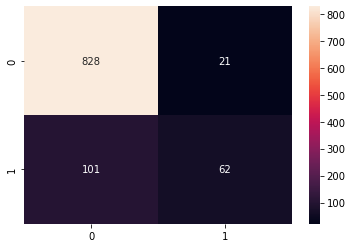

In [136]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix,fmt ='g' ,annot = True)

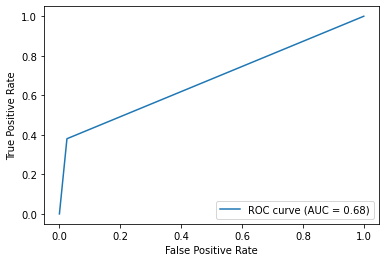

In [142]:
from sklearn.metrics import RocCurveDisplay,auc,roc_curve
fpr, tpr, thresholds = roc_curorve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [143]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

### Support Vector Machines

In [147]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr , tpr)

Model aniqligi: 0.8636363636363636


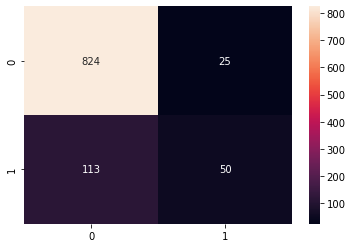

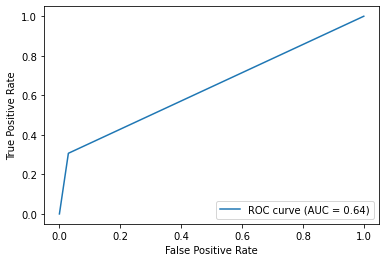

In [150]:
y_pred = svm_model.predict(X_test)
print("Model aniqligi:", accuracy_score(y_test,y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()
display = RocCurveDisplay(fpr = fpr , tpr = tpr , roc_auc = roc_auc , estimator_name = 'ROC curve' )
display.plot()
plt.show()

### Decision Tree 

Model aniqligi: 0.9555335968379447


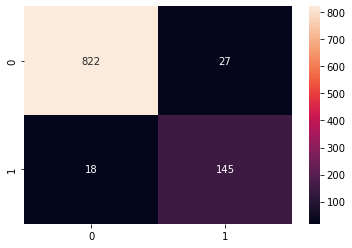

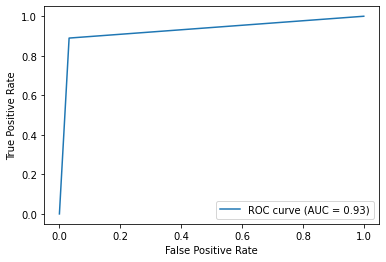

In [158]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train , y_train)
y_pred = tree_model.predict(X_test)
print("Model aniqligi:", accuracy_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(conf_matrix , annot=True ,fmt = 'g')

fpr , tpr , thhresholud  = roc_curve(y_test , y_pred)
roc_auc = auc(fpr , tpr)
display = RocCurveDisplay(fpr = fpr , tpr = tpr , roc_auc = roc_auc , estimator_name = 'ROC curve')
display.plot()
plt.show()

### Random Forest 

In [167]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 9)

Model Aniqligi:0.9446640316205533


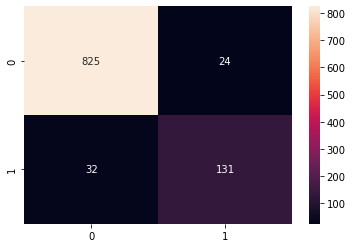

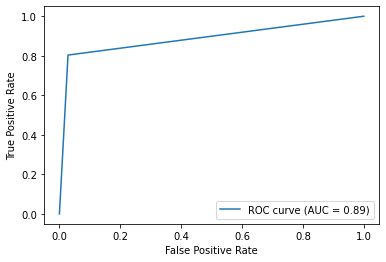

In [176]:
RF_model.fit(X_train , y_train)
y_pred = RF_model.predict(X_test)

print(f"Model Aniqligi:{accuracy_score(y_test , y_pred)}")

conf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(conf_matrix , annot = True , fmt = 'g')
plt.show()

fpr, tpr  ,  j = roc_curve(y_test , y_pred )
roc_auc = auc(fpr , tpr)
display = RocCurveDisplay(fpr = fpr , tpr = tpr , roc_auc = roc_auc , estimator_name = 'ROC curve')
display.plot()

### xgb_model 

C:\ProgramData\Anaconda3\envs\jasurbek_data_siciense\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Aniqligi:0.9456521739130435


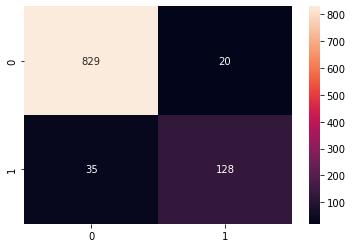

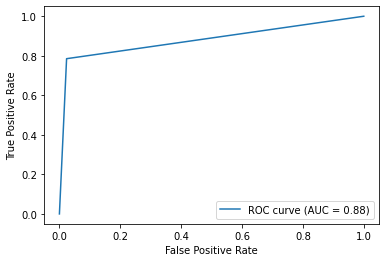

In [181]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(f"Model Aniqligi:{accuracy_score(y_test , y_pred)}")

conf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(conf_matrix , annot = True , fmt = 'g')
plt.show()

fpr , tpr , f  = roc_curve(y_test , y_pred)
roc_auc = auc(fpt,tpt)
display = RocCurveDisplay(fpr = fpr  , tpr = tpr , roc_auc = roc_auc , estimator_name = 'ROC curve')
display.plot()